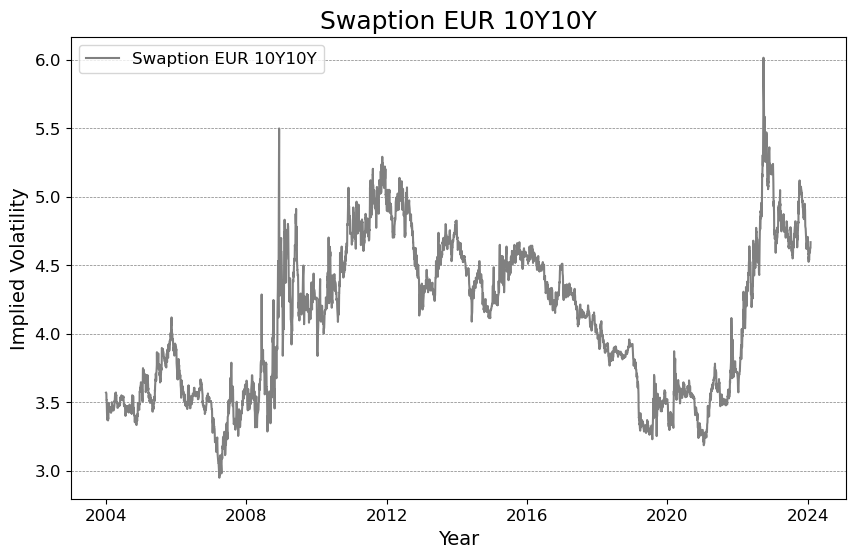

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/nannaingemannohrt/Desktop/master_thesis/main/data/ATM_10Y_10Y_from_2004_2024.xlsx', sheet_name='Ark1', engine='openpyxl')

plt.figure(figsize=(10, 6))
plt.plot(df["Dato"],df["ATM_10Y_10Y"], color='grey', label= 'Swaption EUR 10Y10Y')
plt.title('Swaption EUR 10Y10Y', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Implied Volatility', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

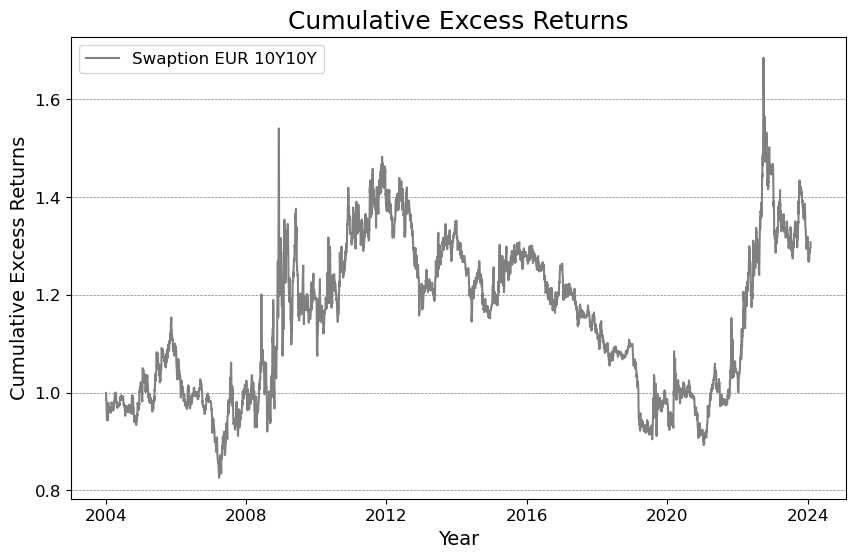

In [25]:
df['Returns'] = df["ATM_10Y_10Y"].pct_change()
    
# Assuming risk-free rate is 0, so excess returns are equal to actual returns in this case
df['Excess Returns'] = df['Returns']
    
# Calculate cumulative excess returns
df['Cumulative Excess Returns'] = (1 + df['Excess Returns']).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(df["Dato"],df['Cumulative Excess Returns'], color='grey', label= 'Swaption EUR 10Y10Y')
plt.title('Cumulative Excess Returns', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Excess Returns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()